In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### scikit-learn 모듈
- Data Cleansing & Feature Engineering
  - `sklearn.preprocessing`: 데이터 전처리 (인코딩, 정규화 등)
  - `sklearn.feature_selection`: feature 선택
  - `sklearn.feature_extraction`: feature 추출 (이미지, 텍스트로 부터 추출)
- Model Evaluation
  - `sklearn.model_selection`: 데이터 분리, 검증 및 모델 튜닝
  - `sklearn.metrics`: 성능 평가
- Supervised Learning Algorithm
  - `sklearn.linear_model`: 선형 모델
  - `sklearn.svm`: 서포트 벡터 머신
  - `sklearn.tree`: 의사결정나무
  - `sklearn.ensemble`: 앙상블 알고리즘
- Unsupervised Learning Algorithm
  - `sklearn.clsuter`: 군집 분석
  - `sklearn.decomposition`: 차원 축소
- Utility&Dataset
  - `sklearn.pipeline`: 워크플로우 효율화
  - `sklearn.datasets`: 예제 데이터셋

### 데이터 불러오기
```python
train = pd.read_csv('train.csv')
```

#### feature
- `pclass`: 자리 등급 (1등석, 2등석, 3등석)
- `name`: 승객 이름
- `sex`: 승객 성별
- `age`: 승객 나이
- `sibsp`: 동승한 자매/배우자 수
- `parch`: 동승한 부모/자식 수
- `ticket`: 티켓 번호
- `fare`: 승객 요금
- `cabin`: 방 호수
- `embarked`: 탑승지
- ~`boat`: 탈출한 보트 번호~ <font color='darkgreen'>: target과 직접적인 연관이 있으므로 제외</font>
- ~`body`: 사망자 확인 번호~ : <font color='darkgreen'>target과 직접적인 연관이 있으므로 제외</font>
- `home.dest`: 고향/목적지

#### target
- `survived`: 생존 여부

In [8]:
# 타이타닉 생존자 데이터
from sklearn.datasets import fetch_openml

In [9]:
data = fetch_openml('titanic', version=1)

In [10]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X = data.data.drop(columns=['boat', 'body'])
y = data.target

In [12]:
display(X.head(3))
display(y.head(3))

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

### 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

### EDA(탐색적 데이터 분석)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 501 to 684
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     916 non-null    float64 
 1   name       916 non-null    object  
 2   sex        916 non-null    category
 3   age        741 non-null    float64 
 4   sibsp      916 non-null    float64 
 5   parch      916 non-null    float64 
 6   ticket     916 non-null    object  
 7   fare       916 non-null    float64 
 8   cabin      214 non-null    object  
 9   embarked   914 non-null    category
 10  home.dest  527 non-null    object  
dtypes: category(2), float64(5), object(4)
memory usage: 73.6+ KB


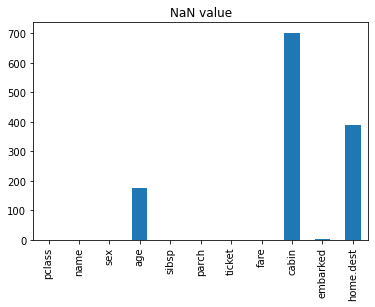

In [16]:
X_train.isna().sum().plot.bar()
plt.title('NaN value')
plt.show()

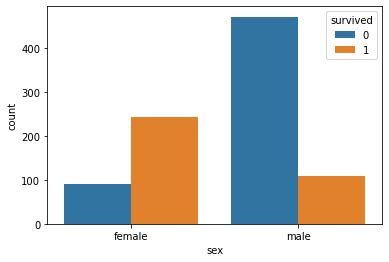

In [17]:
d = pd.concat([X_train.sex, y_train], axis=1)
sns.countplot(data=d, x='sex', hue='survived')
plt.show()

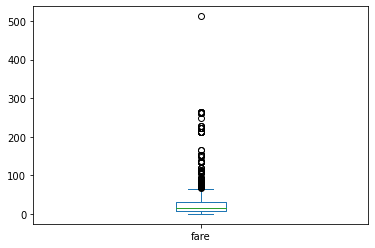

In [18]:
X_train.fare.plot.box()
plt.show()

### 데이터 전처리
검증, 평가 데이터셋에도 **"동일"**한 전처리를 수행해줘야 함

In [19]:
pd.set_option('mode.chained_assignment',  None) ######경고 무시

이상치 처리

In [20]:
upper = X_train.fare.quantile(.25) + 1.5*(X_train.fare.quantile(.75) - X_train.fare.quantile(.25))
print(upper)

42.9646


In [21]:
X_train.fare = X_train.fare.clip(upper=upper)

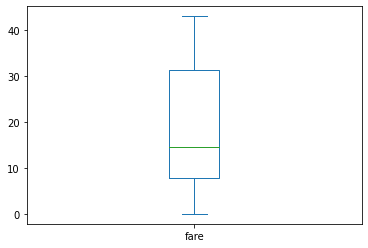

In [22]:
X_train.fare.plot.box()
plt.show()

In [23]:
X_test.fare = X_test.fare.clip(upper=upper)

결측값 처리

In [24]:
X_train['age'] = X_train.age.fillna(X_train.age.mean())
X_train['cabin'] = X_train.cabin.fillna(X_train.cabin.mode()[0])
X_train['embarked'] = X_train.embarked.fillna(X_train.embarked.mode()[0])
X_train['home.dest'] = X_train['home.dest'].fillna('결측치')

In [25]:
X_test['age'] = X_test.age.fillna(X_train.age.mean())
X_test['fare'] = X_test.fare.fillna(X_train.fare.mean())
X_test['cabin'] = X_test.cabin.fillna(X_train.cabin.mode()[0])
X_test['embarked'] = X_test.embarked.fillna(X_train.embarked.mode()[0])
X_test['home.dest'] = X_test['home.dest'].fillna('결측치')

범주형 변수 처리

In [26]:
X_train.sex = X_train.sex.replace(['male', 'female'], [0, 1])
X_test.sex = X_test.sex.replace(['male', 'female'], [0, 1])

value2idx = {x:i for i, x in enumerate(X_train.ticket.unique())}
X_train['ticket'] = X_train.ticket.map(lambda x: value2idx[x])
X_test['ticket'] = X_test.ticket.map(lambda x: value2idx.get(x,-1))

value2idx = {x:i for i, x in enumerate(X_train.cabin.unique())}
X_train['cabin'] = X_train.cabin.map(lambda x: value2idx[x])
X_test['cabin'] = X_test.cabin.map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train.embarked.cat.categories)}
X_train['embarked'] = X_train.embarked.map(lambda x: value2idx[x])
X_test['embarked'] = X_test.embarked.map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train['home.dest'].unique())}
X_train['home.dest'] = X_train['home.dest'].map(lambda x: value2idx[x])
X_test['home.dest'] = X_test['home.dest'].map(lambda x: value2idx.get(x, -1))

In [27]:
X_train = X_train.drop(columns='name')
X_test = X_test.drop(columns='name')

### feature 생성

In [28]:
# feature 생성 예시
X_train['나이대'] = X_train.age.map(lambda x: str(x)[0]+'0대')

value2idx = {x:i for i, x in enumerate(X_train.나이대.unique())}
X_train['나이대'] = X_train.나이대.map(lambda x: value2idx[x])

X_test['나이대'] = X_test.age.map(lambda x: str(x)[0]+'0대')

value2idx = {x:i for i, x in enumerate(X_test.나이대.unique())}
X_test['나이대'] = X_test.나이대.map(lambda x: value2idx[x])

In [29]:
### 과제: feature를 생성하여 모델의 성능을 높이시오.

In [30]:
# 1. 승객요금 3구간으로 나누기

X_train['fare_class'] = pd.qcut(X_train['fare'],3,labels=['low', 'medium', 'high'])
X_test['fare_class'] = pd.qcut(X_test['fare'],3,labels=['low', 'medium', 'high'])

In [31]:
X_train.groupby('fare_class')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
fare_class,,,,,,,,
low,319.0,7.355746,1.670772,0.0000,7.2500,7.7750,7.8958,8.6625
medium,301.0,16.470501,5.418770,8.6833,13.0000,14.5000,21.0000,26.0000
high,296.0,38.513424,6.269733,26.2500,31.6344,42.9646,42.9646,42.9646


In [32]:
# 2. 가족 수 구분

X_train['familysize'] = X_train.sibsp + X_train.parch + 1
X_test['familysize'] = X_test.sibsp + X_test.parch + 1

In [33]:
# 3. 1인 구분

X_train['single'] = np.where(X_train.sibsp + X_train.parch == 0, 1, 0)
X_test['single'] = np.where(X_test.sibsp + X_test.parch == 0, 1, 0)

In [34]:
# 4. 미성년자 구분

X_train["child"] = X_train.apply(lambda i: "adult" if i.age >= 20 else "child", axis=1)
X_test["child"] = X_test.apply(lambda i: "adult" if i.age >= 20 else "child", axis=1)

In [35]:
X_train

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,나이대,fare_class,familysize,single,child
501,2.0,1,13.000000,0.0,1.0,0,19.5000,0,2,0,0,medium,2.0,0,child
588,2.0,1,4.000000,1.0,1.0,1,23.0000,0,2,1,1,medium,3.0,0,child
402,2.0,1,30.000000,1.0,0.0,2,13.8583,0,0,2,2,medium,2.0,0,adult
1193,3.0,0,30.231444,0.0,0.0,3,7.7250,0,1,3,2,low,1.0,1,adult
686,3.0,1,22.000000,0.0,0.0,4,7.7250,0,1,4,3,low,1.0,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3.0,1,0.166700,1.0,2.0,98,20.5750,0,2,51,4,medium,4.0,0,child
835,3.0,0,30.231444,0.0,0.0,696,8.0500,0,2,3,2,low,1.0,1,adult
1216,3.0,1,30.231444,0.0,0.0,697,7.7333,0,1,3,2,low,1.0,1,adult
559,2.0,1,20.000000,0.0,0.0,296,36.7500,0,2,159,3,high,1.0,1,adult


In [36]:
X_test

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,나이대,fare_class,familysize,single,child
1139,3.0,0,38.000000,0.0,0.0,-1,7.8958,0,2,3,0,low,1.0,1,adult
533,2.0,1,21.000000,0.0,1.0,-1,21.0000,0,2,-1,1,medium,2.0,0,adult
459,2.0,0,42.000000,1.0,0.0,359,27.0000,0,2,59,2,high,2.0,0,adult
1150,3.0,0,30.231444,0.0,0.0,269,14.5000,0,2,3,0,medium,1.0,1,adult
393,2.0,0,25.000000,0.0,0.0,268,31.5000,0,2,123,1,high,1.0,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,3.0,0,33.000000,0.0,0.0,-1,7.8542,0,2,3,0,low,1.0,1,adult
580,2.0,1,31.000000,0.0,0.0,168,21.0000,0,2,80,0,medium,1.0,1,adult
1080,3.0,0,30.231444,0.0,0.0,-1,7.7500,0,1,3,0,low,1.0,1,adult
1249,3.0,0,30.231444,0.0,0.0,-1,7.7500,-1,1,3,0,low,1.0,1,adult


### 모델 학습

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train) # 모델 학습

ValueError: could not convert string to float: 'medium'

### 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
model.predict(X_test) # 클래스 예측

In [ ]:
model.predict_proba(X_test) # 각 클래스의 확률 예측

In [ ]:
preds = model.predict(X_test)
acc_score = accuracy_score(y_test, preds) # 성능 측정 (정확도)

probas = model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas) # 성능 측정 (ROC_AUC)

print('Accuracy:\t', acc_score)
print('ROC_AUC:\t', auc_score)